# **ML1010**
# **Independant Coding Project 2**

**Problem:**<br>
Examining numeric columns was becoming a frequent task and beginning to 
consume a great deal of time. In the Group Project it became frequent to 
determine the distribution of items in our dataset. For example, while examining the length of the review, or the number of tokens, the numbers were extremely skewed with very short reviews dominating the dataset, while long reviews were much less common.
It was difficult to understand and visualize this information to make an informed decision about which data to include and exclude from different experiements

**Solution:**<br>
Create a utility function to allow for seeing the data distribution in various capacities by zooming in on subranges of the data as well as changing the reporting detail (data grouping by numeric binning)



# Configuration

In [1]:
#Parameters
PROJECT_NAME = 'ML1010_Weekly'
ENABLE_COLAB = True

#Root Machine Learning Directory. Projects appear underneath
GOOGLE_DRIVE_MOUNT = '/content/gdrive' 
COLAB_ROOT_DIR = GOOGLE_DRIVE_MOUNT + '/MyDrive/Colab Notebooks'
COLAB_INIT_DIR = COLAB_ROOT_DIR + '/utility_files'

LOCAL_ROOT_DIR = '/home/magni/Documents/ML_Projects'
LOCAL_INIT_DIR = LOCAL_ROOT_DIR + '/utility_files'

# Bootstrap Environment

In [3]:
#add in support for utility file directory and importing
import sys
import os

if ENABLE_COLAB:
  #Need access to drive
  from google.colab import drive
  drive.mount(GOOGLE_DRIVE_MOUNT, force_remount=True)
  
  #add in utility directory to syspath to import 
  INIT_DIR = COLAB_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = COLAB_ROOT_DIR
  
else:
  #add in utility directory to syspath to import
  INIT_DIR = LOCAL_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = LOCAL_ROOT_DIR

#Import Utility Support
from jarvis import Jarvis
jarvis = Jarvis(ROOT_DIR, PROJECT_NAME)

import mv_python_utils as mvutils

Mounted at /content/gdrive
Wha...where am I?
I am awake now.

I have set your current working directory to /content/gdrive/MyDrive/Colab Notebooks/ML1010_Weekly
The current time is 11:18
Hello sir. Extra caffeine may help.



# Setup Runtime Environment

In [4]:
if ENABLE_COLAB:
  #!pip install scipy -q
  #!pip install scikit-learn -q
  #!pip install pycaret -q
  #!pip install matplotlib -q
  #!pip install joblib -q
  #!pip install pandasql -q

  display('Google Colab enabled')
else:
  display('Google Colab not enabled')

#Common imports
import json
import gzip
import pandas as pd
import numpy as np
import matplotlib
import re
import nltk
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)
nltk.download('stopwords')
%matplotlib inline

'Google Colab enabled'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Load Data

In [5]:
jarvis.showAllDataFiles()

Here are all your available data files
[D] /content/gdrive/MyDrive/Colab Notebooks/data [Empty directory]

[D] /content/gdrive/MyDrive/Colab Notebooks/data/Jarvis
---[   gz][  pkl]--> 02_NLP_ReviewTextData.pkl.gz (30.08 MB)
---[   gz][  pkl]--> 02_NLP_SummaryData.pkl.gz (2.88 MB)
---[   gz][  csv]--> movie_reviews_cleaned.csv.gz (14.73 MB)
---[   gz][  csv]--> wk3_task_data.csv.gz (33.47 KB)

[D] /content/gdrive/MyDrive/Colab Notebooks/data/Jarvis/01_original [Empty directory]

[D] /content/gdrive/MyDrive/Colab Notebooks/data/Jarvis/02_working [Empty directory]

[D] /content/gdrive/MyDrive/Colab Notebooks/data/Jarvis/03_train
---[   gz][  pkl]--> 02_NLP_SummaryData.pkl.gz (2.88 MB)
---[   gz][  pkl]--> 02_NLP_TitleData.pkl.gz (1.43 MB)
---[   gz][  pkl]--> 03_NLP_ReviewTextData.pkl.gz (10.91 MB)
---[   gz][  pkl]--> 03_NLP_SummaryData.pkl.gz (1.62 MB)

[D] /content/gdrive/MyDrive/Colab Notebooks/data/Jarvis/04_test
---[   gz][  csv]--> pima-indians-diabetes.csv.gz (8.53 KB)
---[   gz][

In [7]:
df = pd.read_pickle('/content/gdrive/MyDrive/Colab Notebooks/data/ML1010-Group-Project/02_working/01_NL_ReviewText_All(new).pkl.gz')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63413 entries, 0 to 63412
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   uuid                                    63413 non-null  object 
 1   reviewText                              63413 non-null  object 
 2   overall                                 63413 non-null  float64
 3   reviewText_lemma                        63413 non-null  object 
 4   reviewText_nouns                        63413 non-null  object 
 5   reviewText_adjectives                   63413 non-null  object 
 6   reviewText_verbs                        63413 non-null  object 
 7   reviewText_nav                          63413 non-null  object 
 8   reviewText_lemma_tb_pol                 63310 non-null  float64
 9   reviewText_lemma_tb_subj                63310 non-null  float64
 10  reviewText_lemma_tb_tokens              63310 non-null  fl

# Independant Code Exploration

In [9]:
mvutils.showColumnSummary(df, 'reviewText_lemma_tb_tokens')

Dataframe shape (63413, 49)
Analysis column: reviewText_lemma_tb_tokens
Distinct values (incl. null): 1014
Number of na   values: 103
Number of null values: 103
Total documents in corpus: 63413



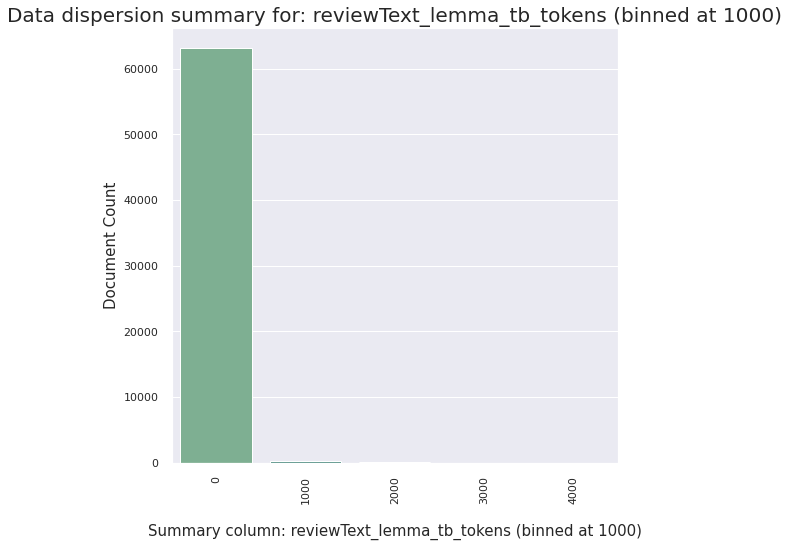

In [13]:
#Examine numeric column for distribution
mvutils.examineColumnNumeric(df, 
                             'reviewText_lemma_tb_tokens'
                             )

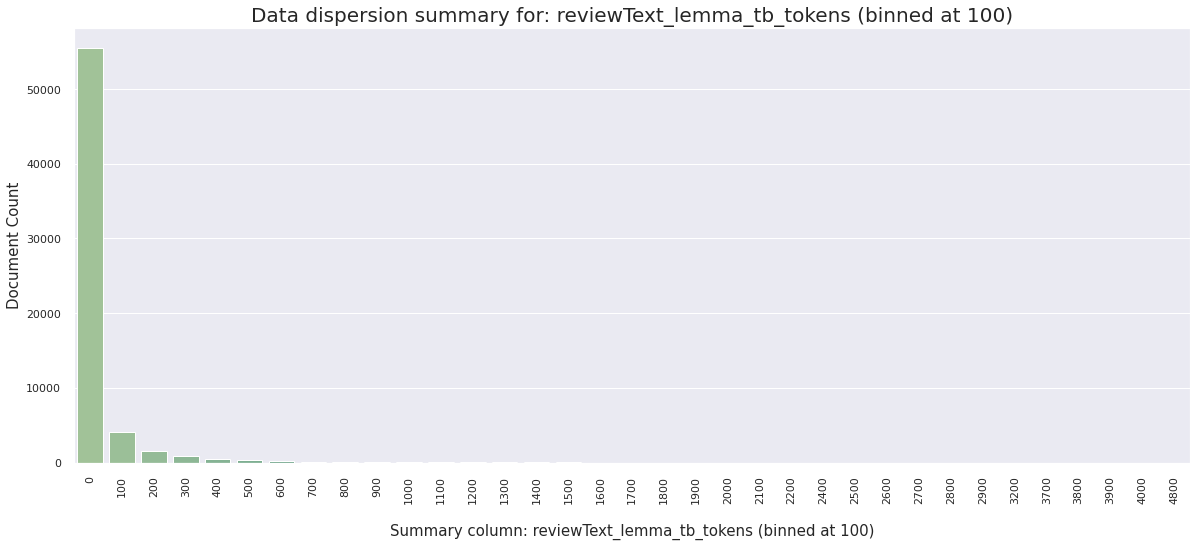

In [15]:
#Increase plotsize for better viewing, 
#change binning size to 100 from default 1000
mvutils.examineColumnNumeric(df, 
                             'reviewText_lemma_tb_tokens', 
                             binsize=100,
                             plotsize=5
                             )

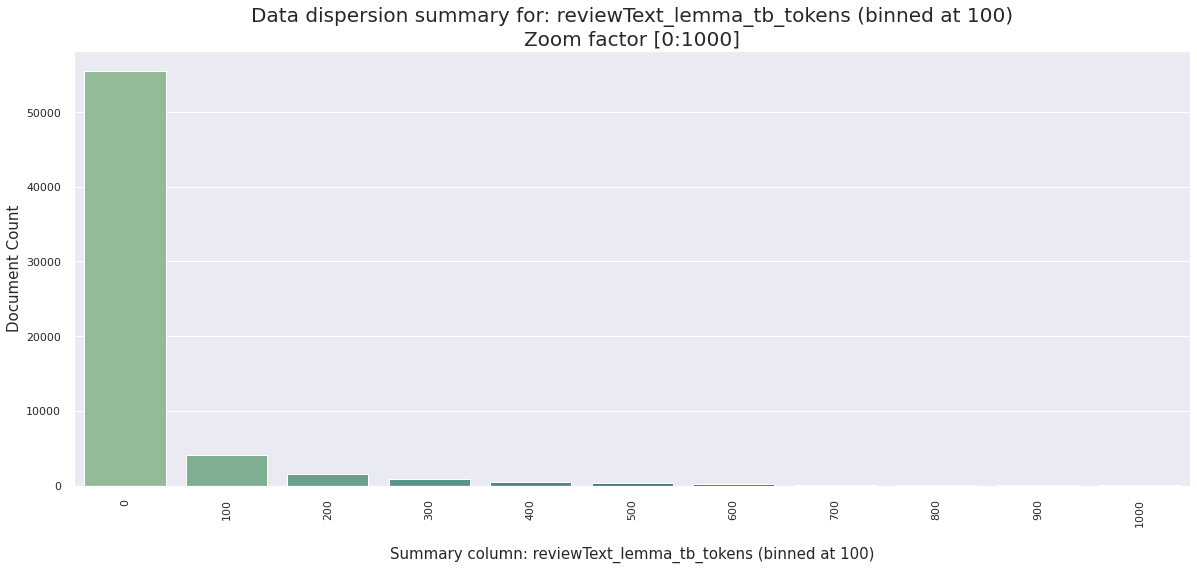

In [16]:
#Enable zoom to examine range 0-1000 binned at 100 for better viewing
mvutils.examineColumnNumeric(df, 
                             'reviewText_lemma_tb_tokens', 
                             binsize=100, 
                             zoom=True,
                             minZoomLevel=0,
                             maxZoomLevel=1000,
                             plotsize=5)

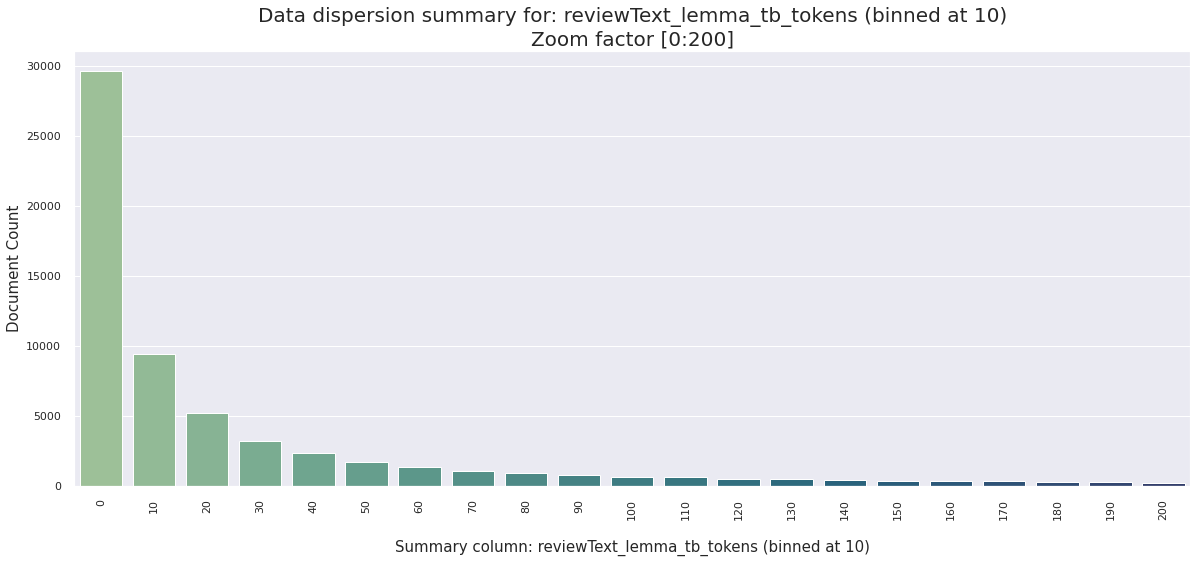

In [18]:
#Data still dominated by 0-100
#Zoom to 0-200 with bin size of 10
mvutils.examineColumnNumeric(df, 
                             'reviewText_lemma_tb_tokens', 
                             binsize=10, 
                             zoom=True,
                             minZoomLevel=0,
                             maxZoomLevel=200,
                             plotsize=5)

In [26]:
import importlib
importlib.reload(mvutils)

<module 'mv_python_utils' from '/content/gdrive/MyDrive/Colab Notebooks/utility_files/mv_python_utils.py'>

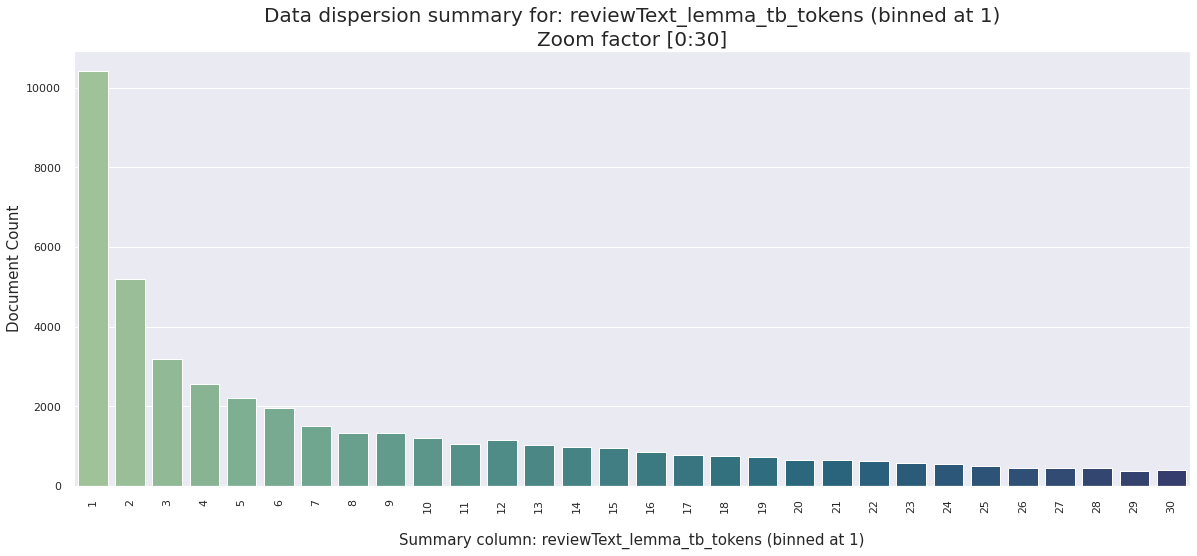

dataframe shape: (30, 2)

dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   bin_at_1     30 non-null     int64
 1   binnedCount  30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes
None

Top 5 in dataframe


,bin_at_1,binnedCount
0,30,388
1,29,371
2,28,446
3,27,438
4,26,440



Bottom 5 in dataframe


,bin_at_1,binnedCount
25,5,2203
26,4,2552
27,3,3184
28,2,5188
29,1,10414


In [28]:
#Still not quite enough detail to determine where to cutoff
#Zoom with binsize 1, range 0-30
mvutils.examineColumnNumeric(df, 
                             'reviewText_lemma_tb_tokens', 
                             binsize=1, 
                             zoom=True,
                             minZoomLevel=0,
                             maxZoomLevel=30,
                             plotsize=5,
                             verbose=True,
                             numRecords=5)

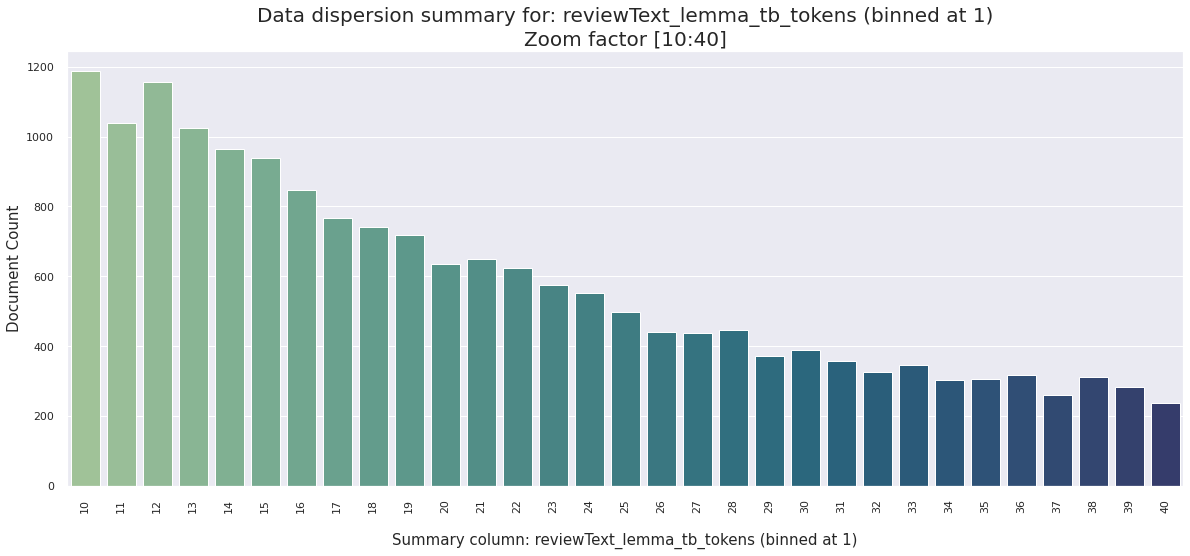

In [22]:
#Need a better view and scale for mid range numbers
#Zoom 10:40 with binsize=1
mvutils.examineColumnNumeric(df, 
                             'reviewText_lemma_tb_tokens', 
                             binsize=1, 
                             zoom=True,
                             minZoomLevel=10,
                             maxZoomLevel=40,
                             plotsize=5)

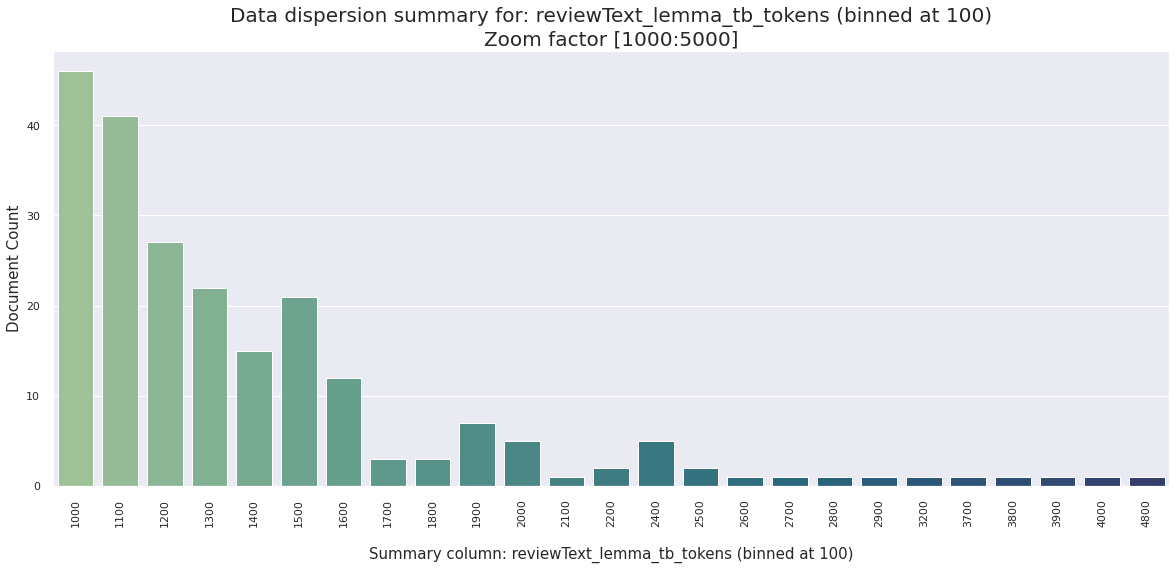

In [17]:
#Examine tail end of data (larger # of tokens)
#Zoom 1000:5000 binsize 100
mvutils.examineColumnNumeric(df, 
                             'reviewText_lemma_tb_tokens', 
                             binsize=100, 
                             zoom=True,
                             minZoomLevel=1000,
                             maxZoomLevel=5000,
                             plotsize=5)

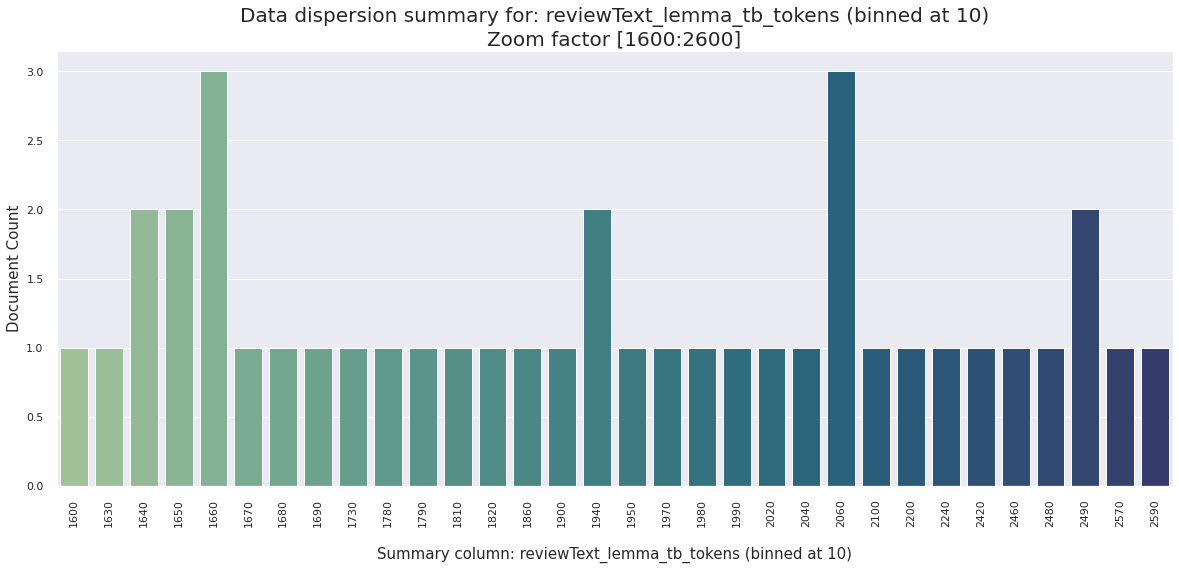

In [24]:
#Examine dropoff near the 1700 range
#Zoom 1600:2600, binsize 10
mvutils.examineColumnNumeric(df, 
                             'reviewText_lemma_tb_tokens', 
                             binsize=10, 
                             zoom=True,
                             minZoomLevel=1600,
                             maxZoomLevel=2600,
                             plotsize=5)